# Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

import datetime

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Part 1: 2017 FY Year-to-Date Budget Report

In [2]:
ytd_2017 = pd.read_excel("./data/FY17 YTD BUD REPORT AS OF PER 13.xlsx")

In [3]:
ytd_2017.head()

,FUND,DEPARTMENT,ORG,OBJ,PROJECT,ACCOUNT,ACCOUNT DESCRIPTION,TYPE,ROLLUP,ORIGINAL APPROP,REVISED BUDGET,YTD ACTUAL,MTD ACTUAL,ENCUMBRANCE/REQ,AVAILABLE BUDGET,% USED,Unnamed: 16
0,1.0,1.0,1001.0,412000.0,NaN,01 -000-001-000-00-00-412000-,REAL ESTATE/PERSONAL PROP. TAX,R,NaN,0.0,-79260447.0,-78230114.79,0.0,0.0,-1030332.21,98.7,NaN
1,1.0,1.0,1001.0,412900.0,NaN,01 -000-001-000-00-00-412900-,TAX LIENS REDEMED,R,NaN,0.0,-120000.0,-2274359.42,0.0,0.0,2154359.42,1895.3,NaN
2,1.0,1.0,1001.0,414240.0,NaN,01 -000-001-000-00-00-414240-,40U LIEN REVENUE REDEMED,R,NaN,0.0,0.0,-494192.19,0.0,0.0,494192.19,100.0,NaN
3,1.0,1.0,1001.0,415000.0,NaN,01 -000-001-000-00-00-415000-,MOTOR VEHICLE EXCISE,R,NaN,0.0,-5178000.0,-5350844.54,0.0,0.0,172844.54,103.3,NaN
4,1.0,1.0,1001.0,417000.0,NaN,01 -000-001-000-00-00-417000-,PENALTIES & INTEREST ON TAXES,R,NaN,0.0,-500000.0,-641505.16,0.0,0.0,141505.16,128.3,NaN


In [4]:
ytd_2017.columns

Index(['FUND', 'DEPARTMENT', 'ORG', 'OBJ', 'PROJECT', 'ACCOUNT',
       'ACCOUNT DESCRIPTION', 'TYPE', 'ROLLUP', 'ORIGINAL APPROP',
       'REVISED BUDGET', 'YTD ACTUAL', 'MTD ACTUAL', 'ENCUMBRANCE/REQ',
       'AVAILABLE BUDGET', '% USED', 'Unnamed: 16'],
      dtype='object')

In [5]:
ytd_2017.dtypes

FUND                   float64
DEPARTMENT             float64
ORG                    float64
OBJ                    float64
PROJECT                float64
ACCOUNT                 object
ACCOUNT DESCRIPTION     object
TYPE                    object
ROLLUP                 float64
ORIGINAL APPROP        float64
REVISED BUDGET         float64
YTD ACTUAL             float64
MTD ACTUAL             float64
ENCUMBRANCE/REQ        float64
AVAILABLE BUDGET       float64
% USED                 float64
Unnamed: 16             object
dtype: object

## Explore: Ways to categorize data

In [38]:
ytd_2017['FUND'].value_counts()

1.0       620
60.0       54
1610.0     26
1590.0     25
1620.0     22
1432.0     18
1681.0     17
1621.0     17
1687.0     15
1503.0     15
1480.0     14
1616.0     14
1523.0     14
1617.0     14
1642.0     13
1541.0     13
1674.0     13
1683.0     11
1411.0     11
1309.0     10
1431.0     10
1445.0     10
1634.0     10
1668.0     10
1307.0     10
1579.0     10
1627.0      9
1628.0      9
84.0        9
1311.0      9
1430.0      9
1641.0      9
1660.0      8
1539.0      8
1535.0      8
1632.0      8
1672.0      8
1826.0      8
1536.0      8
1404.0      8
1680.0      8
1637.0      8
1705.0      8
1553.0      7
1423.0      7
1427.0      7
1636.0      7
1688.0      7
2102.0      7
2515.0      7
1406.0      7
2104.0      7
1679.0      7
1673.0      7
2005.0      7
1526.0      7
1671.0      7
1559.0      7
1561.0      7
2010.0      6
89.0        6
3027.0      6
2194.0      6
1434.0      6
1825.0      6
19.0        6
1305.0      6
1301.0      6
1911.0      6
1697.0      6
2199.0      6
2850.0

In [45]:
ytd_2017['DEPARTMENT'].value_counts()

300.0    1115
210.0     361
181.0     301
320.0     112
0.0       110
220.0      98
121.0      87
420.0      71
1.0        67
521.0      62
541.0      50
145.0      48
340.0      40
161.0      35
310.0      31
430.0      31
330.0      29
610.0      26
230.0      20
241.0      19
650.0      17
162.0      15
127.0      14
141.0      13
125.0      13
184.0      13
522.0      13
135.0      11
800.0      11
151.0      11
140.0      10
244.0       9
440.0       9
543.0       9
138.0       9
450.0       8
549.0       6
176.0       6
460.0       6
122.0       5
182.0       5
524.0       4
470.0       4
390.0       4
525.0       4
187.0       4
111.0       4
590.0       3
165.0       3
911.0       2
171.0       2
211.0       2
291.0       2
990.0       2
Name: DEPARTMENT, dtype: int64

In [46]:
# How many unique departments listed
len(ytd_2017['DEPARTMENT'].unique())

55

In [40]:
ytd_2017['ORG'].value_counts()

1001.0      43
310908.0    30
16101.0     29
15901.0     25
320908.0    22
330908.0    22
340908.0    21
16201.0     21
14202.0     19
15411.0     17
14321.0     17
16211.0     16
16811.0     16
12101.0     15
15031.0     14
16871.0     14
12201.0     14
16161.0     13
604302.0    13
15231.0     13
12102.0     13
16171.0     13
14801.0     13
16421.0     12
14201.0     12
16741.0     12
12301.0     10
8201.0      10
16831.0     10
14111.0     10
15791.0      9
320708.0     9
14451.0      9
16681.0      9
13091.0      9
16341.0      9
13071.0      9
14311.0      9
14301.0      8
321008.0     8
16281.0      8
16271.0      8
16411.0      8
13111.0      8
11251.0      8
16721.0      7
320208.0     7
320608.0     7
11621.0      7
320308.0     7
321208.0     7
15351.0      7
604301.0     7
320808.0     7
16801.0      7
15361.0      7
16371.0      7
14041.0      7
320902.0     7
320408.0     7
12202.0      7
16601.0      7
15391.0      7
17051.0      7
18261.0      7
321108.0     7
16321.0   

In [41]:
ytd_2017['OBJ'].value_counts()

520000.0    266
510100.0    249
570000.0    128
431200.0     87
724155.0     77
530000.0     73
824155.0     70
453000.0     59
823051.0     52
723051.0     51
580000.0     46
497000.0     43
451000.0     42
723303.0     40
723057.0     38
823303.0     31
540000.0     27
823057.0     27
512400.0     26
821101.0     25
472000.0     25
596000.0     25
721101.0     25
512301.0     25
516600.0     24
527800.0     24
511100.0     24
523051.0     22
752006.0     17
852006.0     16
587100.0     15
515700.0     14
821102.0     14
721102.0     14
599906.0     14
490000.0     14
525110.0     13
524115.0     12
523253.0     12
522102.0     11
522101.0     11
525000.0     11
570500.0     11
522111.0     11
520900.0     10
528001.0      9
516400.0      9
541104.0      9
510900.0      9
541315.0      8
524500.0      8
541305.0      8
516100.0      8
523101.0      8
524600.0      7
512200.0      7
522503.0      7
544000.0      6
587300.0      6
423000.0      5
527101.0      5
541500.0      5
580500.0

In [43]:
ytd_2017['PROJECT'].value_counts()

Series([], Name: PROJECT, dtype: int64)

In [7]:
# Check all accounts that are listed to have a total budget approved.
total_account_desc = ytd_2017[ytd_2017['ACCOUNT DESCRIPTION'].str.contains('Total')]
total_account_desc

,FUND,DEPARTMENT,ORG,OBJ,PROJECT,ACCOUNT,ACCOUNT DESCRIPTION,TYPE,ROLLUP,ORIGINAL APPROP,REVISED BUDGET,YTD ACTUAL,MTD ACTUAL,ENCUMBRANCE/REQ,AVAILABLE BUDGET,% USED,Unnamed: 16
43,NaN,1.0,NaN,NaN,NaN,NaN,Total 001 REVENUES,NaN,NaN,0.000000e+00,-1.682673e+08,-1.707986e+08,-220992.00,0.00,2.531275e+06,101.5,*
47,NaN,111.0,NaN,NaN,NaN,NaN,Total 111 CITY COUNCIL,NaN,NaN,3.274860e+05,3.290028e+05,3.289736e+05,0.00,0.00,2.916000e+01,100.0,*
55,NaN,121.0,NaN,NaN,NaN,NaN,Total 121 MAYOR,NaN,NaN,5.489170e+05,1.255788e+06,1.116290e+06,0.00,133388.08,6.110380e+03,99.5,*
60,NaN,122.0,NaN,NaN,NaN,NaN,Total 122 NORTHEAST REGIONAL VOCATI,NaN,NaN,1.912211e+06,1.912211e+06,1.858112e+06,0.00,0.00,5.409896e+04,97.2,*
71,NaN,125.0,NaN,NaN,NaN,NaN,Total 125 HUMAN RESOURCES,NaN,NaN,1.961975e+07,1.942975e+07,1.933923e+07,0.00,0.00,9.052044e+04,99.5,*
74,NaN,127.0,NaN,NaN,NaN,NaN,Total 127 OFF INNOVATION & DATA MGT,NaN,NaN,7.896500e+04,7.896500e+04,7.359627e+04,0.00,0.00,5.368730e+03,93.2,*
85,NaN,135.0,NaN,NaN,NaN,NaN,Total 135 AUDITING DEPARTMENT,NaN,NaN,1.453158e+06,1.559511e+06,1.445200e+06,0.00,10597.20,1.037146e+05,93.3,*
92,NaN,138.0,NaN,NaN,NaN,NaN,Total 138 PURCHASING DEPARTMENT,NaN,NaN,2.521290e+05,2.606938e+05,2.398930e+05,0.00,8564.75,1.223598e+04,95.3,*
102,NaN,140.0,NaN,NaN,NaN,NaN,Total 140 INFORMATION TECHNOLOGY,NaN,NaN,1.043463e+06,1.051608e+06,9.944583e+05,0.00,8145.00,4.900474e+04,95.3,*
113,NaN,141.0,NaN,NaN,NaN,NaN,Total 141 ASSESSORS,NaN,NaN,3.552730e+05,3.647881e+05,3.597525e+05,0.00,975.10,4.060480e+03,98.9,*


In [8]:
# Check how many different unique ACCOUNT DESCRIPTIONS exist
total_account_desc['ACCOUNT DESCRIPTION'].value_counts()

Total 300 SCHOOL DEPARTMENT            206
Total 210 POLICE DEPARTMENT            111
Total 181 PLANNING & COMMUNITY DEVE     85
Total 000                               31
Total 220 FIRE DEPARTMENT               25
Total 121 MAYOR                         24
Total 541 COUNCIL ON ELDER AFFAIRS      16
Total 521 HEALTH INSPECTION DIVISIO     13
Total 420 PUBLIC WORKS DEPARTMENT       12
Total 145 COLLECTOR/TREASURER           10
Total 161 CITY CLERK                     8
Total 001 REVENUES                       5
Total 127 OFF INNOVATION & DATA MGT      4
Total 610 LIBRARY                        4
Total 650 RECREATION SERVICES            4
Total 184 ENGINEERING                    3
Total 522 PUB HLTH INITIATIVES           3
Total 241 BUILDING DIVISION              3
Total 176 APPEALS BOARD                  2
Total 162 ELECTION DEPARTMENT            2
Total 125 HUMAN RESOURCES                2
Total 138 PURCHASING DEPARTMENT          2
Total 141 ASSESSORS                      2
Total 549 C

In [13]:
# Check total amount of unique ACCOUNT DESCRIPTION exists
len(total_account_desc['ACCOUNT DESCRIPTION'].unique())

609

## Findings: 55 `departments`, 609 `account descriptions`
### - `ACCOUNT DESCRIPTIONS` have 'total budgets'
### - Create dictionary of departments with department codes using Department List given by Assistant Auditor
### - Explore `DEPARTMENTS`

In [47]:
# Create Department Dictionary
dept_dict = {111:'CITY COUNCIL',
            121:'MAYOR',
            122:'REGIONAL SCHOOLS',
            125:'HUMAN RESOURCES',
            127:'OFFICE OF INNOVATION & DATA MGMT',
            135:'CITY AUDITOR/BUDGET DIRECTOR',
            138:'PURCHASING',
            140:'INFORMATION TECHNOLOGIES',
            141:'ASSESSORS',
            145:'TREASURER/COLLECTOR',
            151:'CITY SOLICITOR',
            161:'CITY CLERK',
            162:'ELECTION',
            165:'LICENSING',
            171:'CONSERVATION COMMISSION',
            176:'APPEALS BOARD',
            182:'OFF OF STRAT PLAN & ECON DEV',
            184:'ENGINEERING',
            210:'POLICE',
            211:'AUXILIARY POLICE',
            220:'FIRE',
            230:'EMERGENCY COMMUNICATIONS CENTER',
            241:'BUILDING DIVISION',
            244:'WEIGHTS & MEASURES',
            291:'CIVIL DEFENSE',
            295:'PARKING CONTROL',
            300:'SCHOOL DEPARTMENT',
            420:'PUBLIC WORKS',
            521:'HEALTH INSPECTION DIVISION',
            522:'PUBLIC HEALTH INITIATIVES',
            524:'HEALTH COMMUNITY INITIATIVES',
            525:'SUBSTANCE USE INITIATIVES',
            541:'COUNCIL ON ELDER AFFAIRS',
            543:'OFFICE OF VETERANS SERVICES',
            549:'COMMISSION ON DISABILITY',
            590:'CONSUMER AFFAIRS',
            610:'LIBRARY',
            650:'RECREATION SERVICES',
            710:'RETIREMENT OF LONG TERM CAPITAL DEBT',
            751:'LONG TERM DEBT INTEREST',
            752:'SHORT TERM DEBT INTEREST',
            900:'UNCLASSIFIED BENEFITS',
            911:'PENSION AND RETIREMENT'}

In [19]:
# Explore lines of TOTAL SCHOOL DEPARTMENT
total_account_desc[total_account_desc['ACCOUNT DESCRIPTION'] == 'Total 300 SCHOOL DEPARTMENT']

,FUND,DEPARTMENT,ORG,OBJ,PROJECT,ACCOUNT,ACCOUNT DESCRIPTION,TYPE,ROLLUP,ORIGINAL APPROP,REVISED BUDGET,YTD ACTUAL,MTD ACTUAL,ENCUMBRANCE/REQ,AVAILABLE BUDGET,% USED,Unnamed: 16
322,NaN,300.0,NaN,NaN,NaN,NaN,Total 300 SCHOOL DEPARTMENT,NaN,NaN,16791634.00,19170773.71,18933770.75,0.00,117229.54,119773.42,99.4,*
674,NaN,300.0,NaN,NaN,NaN,NaN,Total 300 SCHOOL DEPARTMENT,NaN,NaN,-24050.00,-24050.00,0.00,0.00,0.00,-24050.00,0.0,NaN
678,NaN,300.0,NaN,NaN,NaN,NaN,Total 300 SCHOOL DEPARTMENT,NaN,NaN,-41563.00,-41563.00,0.00,0.00,0.00,-41563.00,0.0,NaN
682,NaN,300.0,NaN,NaN,NaN,NaN,Total 300 SCHOOL DEPARTMENT,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,NaN
689,NaN,300.0,NaN,NaN,NaN,NaN,Total 300 SCHOOL DEPARTMENT,NaN,NaN,15288.90,15288.90,0.00,0.00,0.00,15288.90,0.0,NaN
700,NaN,300.0,NaN,NaN,NaN,NaN,Total 300 SCHOOL DEPARTMENT,NaN,NaN,13160.00,13160.00,0.00,0.00,0.00,13160.00,0.0,NaN
703,NaN,300.0,NaN,NaN,NaN,NaN,Total 300 SCHOOL DEPARTMENT,NaN,NaN,337.80,337.80,0.00,0.00,0.00,337.80,0.0,NaN
724,NaN,300.0,NaN,NaN,NaN,NaN,Total 300 SCHOOL DEPARTMENT,NaN,NaN,8657.50,8657.50,4509.75,0.00,0.00,4147.75,52.1,NaN
731,NaN,300.0,NaN,NaN,NaN,NaN,Total 300 SCHOOL DEPARTMENT,NaN,NaN,10537.00,10537.00,0.00,0.00,0.00,10537.00,0.0,NaN
737,NaN,300.0,NaN,NaN,NaN,NaN,Total 300 SCHOOL DEPARTMENT,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,NaN


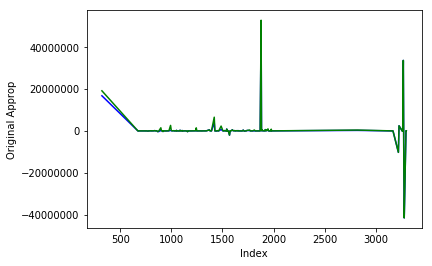

In [37]:
# Graph ORIGINAL APPROP by Indexed line items
mask = total_account_desc['ACCOUNT DESCRIPTION'] == 'Total 300 SCHOOL DEPARTMENT'
plt.plot(total_account_desc[mask]['ORIGINAL APPROP'], color='b')
plt.plot(total_account_desc[mask]['REVISED BUDGET'], color='g')
plt.xlabel('Index')
plt.ylabel('Original Approp')
plt.ticklabel_format(useOffset=False, style='plain')